<a href="https://colab.research.google.com/github/niq1487/Data_Analyst_Internship_Curriculum/blob/master/Bomber_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 💣 Бомбер 2.0  💥

---
Этот ноутбук понадобится тебе в редком кейсе, когда нужно обстрелять релизную версию проекта на проде (не в симуляции).

Для обстрела проекта в симуляции воспользуйся интерфейсом в Истории диалогов 2.0 "Заливка примеров"

Здесь будет использоваться API v2. С документацией можно ознакомиться [здесь](https://documenter.getpostman.com/view/21809341/2s9Y5Ww2xX#b59c4be4-f1da-4f98-8bb3-929d797324d4)



---

# ⚡ Подготовительные работы

(!) Этот бомбер будет отправлять запросы в прод, поэтому убедись, что эти диалоги не будут прайситься и не испортят статистику в проекте.

Чтобы всё заработало, нужно:
1. подключить проект к входящей интеграции "external" - [тык](https://supportai.yandex/incoming-integrations)

    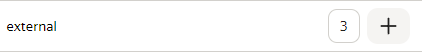

2. "занулить" ip-адреса, как показано на скрине - [тык](https://supportai.yandex/projects-list)

    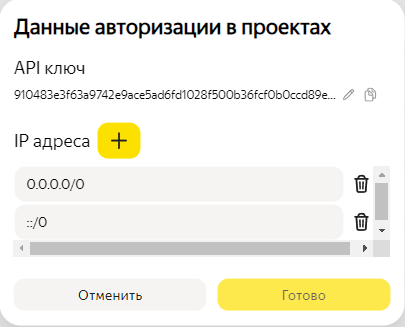

3. Сохранить себе api-key с вкладки "Список проектов" - [тык](https://supportai.yandex/projects-list)

In [1]:
# @title Подгружаем и импортируем нужные для работы модули { vertical-output: true, form-width: "40%", display-mode: "form" }
# @title  { form-width: "40%" }
# @title  { form-width: "200px" }

# @markdown Выполни этот блок, нажав на [▶]

!pip install requests pandas tqdm

import io
import json
import os
import time

from google.colab import files

import pandas as pd
import requests
from tqdm.auto import tqdm
from IPython.display import clear_output

clear_output(wait=False)

In [2]:
# @title Заполняем данные о проекте { vertical-output: true, form-width: "40%", display-mode: "form" }
# @title  { form-width: "40%" }
# @title  { form-width: "200px" }
# @markdown 1.
# @markdown Выполни блок, нажав на [▶]



slug = str(input("project_slug: ")) #= "clustering_test_dialog"
# @markdown 2.
# @markdown Введи слаг проекта (например: clustering_test_dialog)

api_key = str(input("api_key: ")) #= "910483e3f63a9742e9ace5ad6fd1028f500b36fcf0b0ccd89ea921c9307be7ae"
# @markdown 3.
# @markdown Введи api_key этого проекта

rps = 1

clear_output(wait=False)

In [3]:
# @title Загружаем таблицу { vertical-output: true, form-width: "40%", display-mode: "form" }
# @title  { form-width: "40%" }
# @title  { form-width: "200px" }

# @markdown 1. Выполни этот блок, нажав на [▶]

# @markdown 2. Выбери фаил для загрузки

uploaded = files.upload()

# @markdown 3. Дождись выполнения блока
filename = next(iter(uploaded))

extension = os.path.splitext(filename)[1]

if extension == '.xlsx':
    df = pd.read_excel(filename)
    clear_output(wait=False)
elif extension == '.csv':
    df = pd.read_csv(filename)
    clear_output(wait=False)
elif extension == '.tsv':
    df = pd.read_csv(filename, delimiter='\t')
    clear_output(wait=False)
else:
    print("Неподдерживаемое расширение файла")
    clear_output(wait=True)

# print(df)

In [ ]:
# @title Запускаем бомбер { vertical-output: true, form-width: "40%", display-mode: "form" }
# @title  { form-width: "40%" }
# @title  { form-width: "200px" }

# @markdown 1. Выполни этот блок, нажав на [▶]

url = f"https://supportai-api.taxi.yandex.net/supportai-api/v2/external/external/basic?project_id={slug}&api_key={api_key}"
delay = 1/rps

columns_dict = {}
for column in df.columns:
    columns_dict[column] = df[column].tolist()

bodies = []
response_results = []

for i in range(len(columns_dict["text"])):
    body = {"text": (str(columns_dict["text"][i]) if str(columns_dict["text"][i]).lower() != 'nan' else ''), "features": []}
    for column in columns_dict:
        if (column != "text" and not str(columns_dict[column][i]).lower() == 'nan' and not column == ''):
            body["features"].append({
                "key": str(column),
                "value": str(columns_dict[column][i])
            })
    bodies.append(body)

# @markdown 2. Дождись окончания загрузки

with tqdm(bodies, desc='Отправка запросов') as progress_bar:
    for body in progress_bar:
        response = requests.post(url, json=body)
        response_results.append((response.status_code, response.text))
        print((response.status_code, response.text))
        progress_bar.set_postfix({'status': response.status_code, 'response': response.text})
        time.sleep(delay)

# for result in response_results:
#     print(result)

clear_output(wait=True)

In [5]:
# @title Прибраем за собой { vertical-output: true, form-width: "40%", display-mode: "form" }
# @title  { form-width: "40%" }
# @title  { form-width: "200px" }

# @markdown 1. Выполни этот блок, нажав на [▶], чтобы удалить загруженный файл и записанные переменные

answer = str(input("Y/N: "))
accepted = bool(answer == "Y" or answer == "y")

if accepted:

    for file in os.listdir('/content/'):
        if os.path.exists(filename):
            os.remove(filename)

    for name in dir():
        if not name.startswith("_"):
            del globals()[name]

    # os.kill(os.getpid(), 9)

    print("Всё удалено 👌")
else:
    clear_output(wait=False)

# !rm -rf /root/.local/share/jupyter/nbmetadata/*

Y/N: y
Всё удалено 👌
